1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

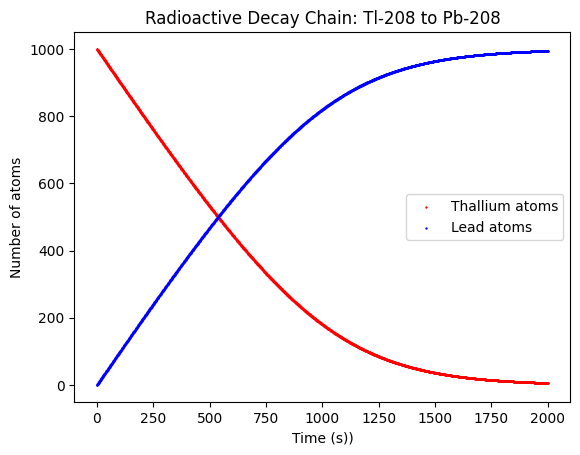

In [21]:
import numpy as np
import matplotlib.pyplot as plt

#constants
tau = 3.052 * 60
total_time = 2000
time_steps = np.arange(0, total_time+1, 1)

#initial number of atoms
tl_0 = 1000
pb_0 = 0

def p():
    global tl
    return 1 - 2**(-tl[-1]/tau)

tl = [tl_0]
pb = [pb_0]

for t in time_steps[1:]:
    decayed_tl = p()
    tl.append(tl[-1] - decayed_tl)
    pb.append(pb[-1] + decayed_tl)

plt.scatter(time_steps, tl, s=0.5, c='r', label='Thallium atoms')
plt.scatter(time_steps, pb, s=0.5, c='b', label='Lead atoms')
plt.xlabel('Time (s))')
plt.ylabel('Number of atoms')
plt.title('Radioactive Decay Chain: Tl-208 to Pb-208')
plt.legend(loc='best')
plt.show()

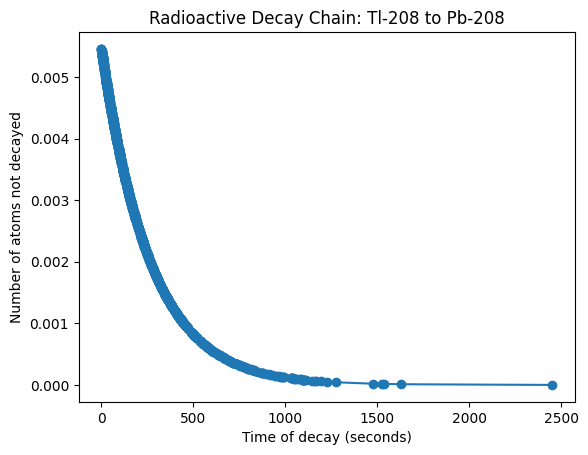

In [39]:
def p(t):
    return 2**(-t/tau) * np.log2(2) / tau

def cdf(t):
    return 1 - 2**(-tl[-1]/tau)

def icdf(u):
    return -tau * np.log2(1 - u)

u = np.random.random(1000)
t = icdf(u)
t.sort()

plt.plot(t, p(t), marker='o')
plt.xlabel('Time of decay (seconds)')
plt.ylabel('Number of atoms not decayed')
plt.title('Radioactive Decay Chain: Tl-208 to Pb-208')
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

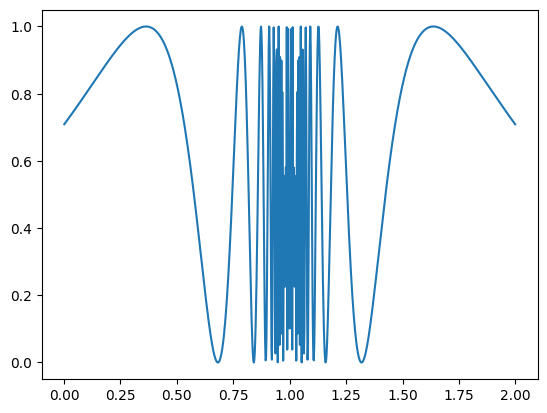

In [44]:
def f(x):
    return np.sin(1/(1-x))**2

x = np.linspace(0.001, 1.999, 1000)
plt.plot(x, f(x))

In [70]:
a, b = 0, 2

# Simple Monte Carlo integration
n = 100000
count = 0
h = 1

def hit_miss(x_min, x_max, h, n):
    X = np.random.uniform(x_min, x_max, n)
    Y = np.random.uniform(0, h, n)
    count = X[Y < f(X)].shape[0]
    I = count / n * h * (b-x_min)
    return I

I_hit_miss = hit_miss(a, b, h, n)


# Error analysis
N = 100

def calc_sigma(x_min, x_max, h, n, m):
    I_array = np.array([hit_miss(x_min, x_max, h, n) for mi in range(m)])
    sigma = np.sqrt(np.mean(I_array**2) - np.mean(I_array)**2)
    return sigma

sigma_hit_miss = calc_sigma(a, b, h, n, N)
print("Integral with hit/miss method: %.3f +- %.3f" % (I_hit_miss, sigma_hit_miss))


# Mean value method
n_mean_value = 10

def mean_value(x_min, x_max, n):
    X = np.random.uniform(x_min, x_max, n)
    Y = np.array([f(Xi) for Xi in X])
    s = np.sum(Y)
    I = (x_max-x_min) / n * s
    return I

I_mean_value = mean_value(a, b, n_mean_value)


# Error analysis
N = 100

def calc_sigma_mean_value(x_min, x_max, n, m):
    I_array = np.array([mean_value(x_min, x_max, n) for mi in range(m)])
    sigma = np.sqrt(np.mean(I_array**2) - np.mean(I_array)**2)
    return sigma

sigma_mean_value = calc_sigma_mean_value(a, b, n_mean_value, N)
print("Integral with mean value method: %.3f +- %.3f" % (I_mean_value, sigma_mean_value))

Integral with hit/miss method: 1.342 +- 0.003
Integral with mean value method: 1.374 +- 0.207


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [87]:
def f_2D(x, y):
    return x**2 + y**2 <= 1

def monte_carlo_2D(x_min, x_max, n):
    X = np.random.uniform(x_min, x_max, n)
    Y = np.random.uniform(x_min, x_max, n)
    Z = f_2D(X, Y)
    s = np.sum(Z)
    I = (x_max-x_min)**2 / n * s
    return I

N = 1000000
I_2D = monte_carlo_2D(-1, 1, N)
print("Area of a circle of unit radius: %0.3f" % I_2D)

Area of a circle of unit radius: 3.139


In [108]:
def f_10D(point):
    return np.sum(point**2) <= 1

def monte_carlo_10D(x_min, x_max, n):
    X = np.array([f_10D(np.random.uniform(x_min, x_max, 10)) for _ in range(n)])
    s = np.sum(X)
    I = (x_max-x_min)**10 / n * s
    return I

N = 100000
I_10D = monte_carlo_10D(-1, 1, N)
print("Area of a 10D sphere of unit radius: %0.3f" % I_10D)

Area of a 10D sphere of unit radius: 2.458


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18392\848504259.py:2: RuntimeWarning: divide by zero encountered in power
  return x**(-1/2) / (np.exp(x)+1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18392\848504259.py:5: RuntimeWarning: divide by zero encountered in divide
  return 1 / np.sqrt(x)


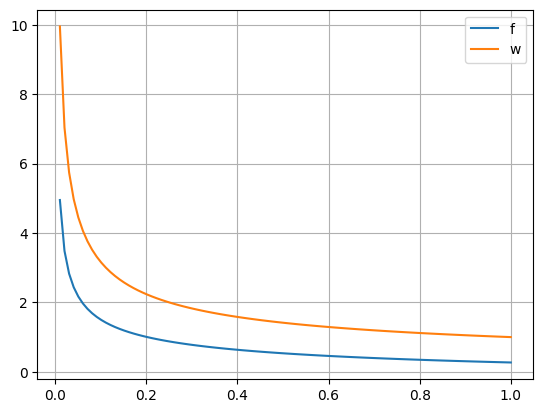

In [132]:
def f(x):
    return x**(-1/2) / (np.exp(x)+1)

def w(x):
    return 1 / np.sqrt(x)

x = np.linspace(0, 1, 100)
plt.plot(x, f(x), label='f')
plt.plot(x, w(x), label='w')
plt.legend()
plt.grid()

In [142]:
from scipy import integrate

n = 100000

x = np.random.uniform(0, 1, n)**2

f_values = f(x)
w_values = w(x)

w_int, _ = integrate.quad(w, 0, 1)
print("w_int:", w_int)  # we obtain exactly 2 on the paper

I = 1.0 / n * np.sum(f_values / w_values) * w_int
print("Integral:", I)


w_int: 1.9999999999999984
Integral: 0.8390531082141299
